In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("Prodigy University Dataset.csv")

In [17]:
data.head()

,sat_sum,hs_gpa,fy_gpa
0,508,3.40,3.18
1,488,4.00,3.33
2,464,3.75,3.25
3,380,3.75,2.42
4,428,4.00,2.63


In [18]:
data.shape

(1000, 3)

In [19]:
data.isnull().sum()

sat_sum    0
hs_gpa     0
fy_gpa     0
dtype: int64

In [20]:
# Scale data
scaler = MinMaxScaler()
data[['sat_sum', 'hs_gpa', 'fy_gpa']] = scaler.fit_transform(data[['sat_sum', 'hs_gpa', 'fy_gpa']])

In [21]:
# Prepare training and testing data
X = data[['sat_sum', 'hs_gpa']].values
y = data['fy_gpa'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Define ANN model
def create_model():
    model = Sequential([
        Dense(64, input_dim=2, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    return model

In [23]:
# Train and evaluate model with different optimizers
def train_and_evaluate(optimizer, name):
    model = create_model()
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name} - Loss: {loss:.4f}, MAE: {mae:.4f}")
    return model, history

In [24]:
# Run training for each optimizer
model_adam, history_adam = train_and_evaluate(Adam(learning_rate=0.01), "Adam")
model_sgd, history_sgd = train_and_evaluate(SGD(learning_rate=0.01), "SGD")
model_rmsprop, history_rmsprop = train_and_evaluate(RMSprop(learning_rate=0.01), "RMSprop")

# Create predictions
predictions = model_adam.predict(X_test)

C:\Users\rajpu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Adam - Loss: 0.0259, MAE: 0.1207
SGD - Loss: 0.0247, MAE: 0.1213
RMSprop - Loss: 0.0252, MAE: 0.1203
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


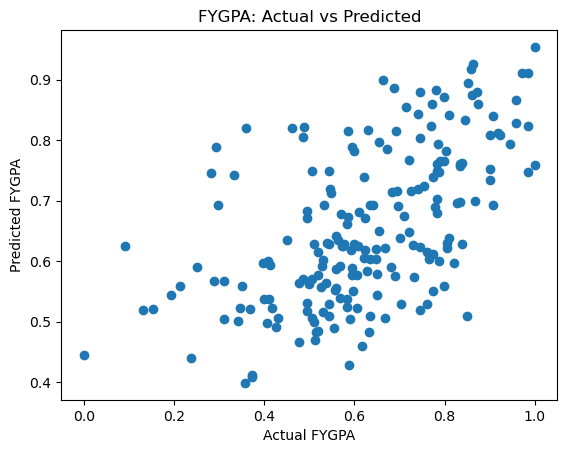

In [25]:
# Visualize results
plt.scatter(y_test, predictions)
plt.xlabel("Actual FYGPA")
plt.ylabel("Predicted FYGPA")
plt.title("FYGPA: Actual vs Predicted")
plt.show()